# Overview 

Please see the [homework policy](https://fdl.thecoatlessprofessor.com/syllabus/#homework)
for detailed instructions and some grading notes. Failure to follow instructions
will result in point reductions. In particular, make sure to commit each 
exercise as you complete them. 

> "Machine intelligence is the last invention that humanity will ever need to make."
>
> -- Nick Bostrom

## Grading

The rubric CAs will use to grade this assignment is:

| Task                                                   | Pts |
|:-------------------------------------------------------|----:|
| Making a Homemade Neural Network from Scratch!         | 100 |
| Cruisin' Keras                                         | 20  |
| PyTorch et al are friends not food                     | 30  |
| Total                                                  | 150 |

## Objectives 

The objectives behind this homework assignment are as follows:

- Implement functions in Python;
- Constructing neural networks;
- Designing PyTorch modules; and
- Establishing sequential layers with Keras.

# Assignment - Homework 4
STAT 430 - FDL, Spring 2020

Due: **Sunday, April 12th, 2020 at 6:00 PM**

- **Author:** Josh Janda
- **NetID:** joshlj2

### Collaborators

If you worked with any other student in preparing these answers, please
make sure to list their full names and NetIDs (e.g. `FirstName LastName (NetID)` ).


In [0]:
print("Diagnostics: ")

try:
  from google.colab import drive
  is_google_colab = True
  import sys
  import pandas as pd
  import numpy as np

  %tensorflow_version 2.x
  import tensorflow as tf

  import torch
  import torch.nn as nn
  import torch.nn.functional as F
  import torch.optim as optim
  from torchvision import datasets, transforms
  from torch.optim.lr_scheduler import StepLR
  # Detect if a GPU is present with CUDA support
  use_cuda = torch.cuda.is_available()

  print(f"python: {sys.version}")
  print(f"pandas: {np.__version__}")
  print(f"tensorflow: {tf.__version__}")
  print(f"pytorch: {torch.__version__}")
  print(f"GPU Enabled: {use_cuda}")
  print("Notebook is on Google CoLab")
except:
  is_google_colab = False
  print("Notebook is being run locally or through another source.")

Diagnostics: 
python: 3.6.9 (default, Nov  7 2019, 10:44:02) 
[GCC 8.3.0]
pandas: 1.18.2
tensorflow: 2.2.0-rc2
pytorch: 1.4.0
GPU Enabled: True
Notebook is on Google CoLab


## [50 points] Exercise 1 - Making a Homemade Neural Network from Scratch!

In this exercise block, we'll build a neural network that consists of two hidden layers and an output layer.

In the first and second hidden layers, there will be _unknown_ number of neurons. Let the neurons in the first hidden layer be denoted as $n_j^{(1)}$. Within the second hidden layer and output layer, let there be $n_c^{(2)}$ neurons. Both hidden layers should include a bias term to make the counts respectively $n_j^{(1)} + 1$ and $n_c^{(2)} + 1$.  For the non-linear activation functions, let the first hidden layer use 
$g^{(1)} (x) = \mathrm{ReLU}(x)$, the second hidden layer be $g^{(2)} (x) = \sigma(x)$. Finally, in the output layer, apply the $\mathrm{softmax}(x)$ to obtain exactly $n_c^{(2)}$ neurons that correspond to $C$ classes. 

We'll use the categorical cross-entropy cost function of 

$$
J\left(\boldsymbol{W}\right) = -\frac{1}{N} \sum_{i=1}^{N} { \sum_{c=1}^{C} { y_{ic} \log\left({ \hat y_{ic} }\right)  }}
$$

where,

- $\boldsymbol{W}$ represents the weights of the neural network -- including the bias term,
- $N$ represents the number of examples the network is being trained with,
- $y_{ic}$ is the true label in $c \in C$, and;
- $\hat y_{ic}$ is the predicted label probability in $c \in C$.

Within this part, we'll construct functions that: 

1. Initialize the parameters of the network.
1. Train
  - Perform forward propagation
  - Compute cost function
  - Perform backward propagation
  - Update network parameters
1. Predict




### (a) (10 points) Sketching the computational graph

Sketch the computational graph for the described neural network. For each layer on the graph, write out the forward propagation equations in matrix equation form. 



![](https://i.imgur.com/SQR5AVT.jpg)

### (b) (10 points) Deriving the backward propagation equations

Within this step, derive the backward propagation equations for the network
by obtaining the necessary partial derivatives.



![](https://i.imgur.com/6xJ8fpA.jpg)

### (c) (5 points) Training Data Reshaping

Reshaping data is a common requirement for working with neural networks. Previously, the assumption about data in neural networks
was that there is exactly _one_ example or image. In practice, there needs to
be a large amount of data for the neural network to function. Previously, $X$ was defined to be a single input vector: 

$$
X_{m \times 1} = \begin{bmatrix}
\vert \\
X^{[1]}  \\
\vert  \\
\end{bmatrix}_{m \times 1}
$$

To enable multiple training examples, let's define $X$ to be:

$$
X_{m \times n_e} = \begin{bmatrix}
\vert & \vert & \vert \\
X^{[1]} & X^{[2]} & X^{[3]} \\
\vert & \vert & \vert \\
\end{bmatrix}_{m \times n_e}
$$

where $m$ is the number of inputs and $n_e$ is the number of observations. Therefore, $Z^{(1)}$ would now look like:

$$
Z^{(1)} = \begin{bmatrix}
\vert & \vert & \vert \\
Z^{(1)[1]} & Z^{(1)[2]} & Z^{(1)[3]} \\
\vert & \vert & \vert \\
\end{bmatrix}_{n_h \times n_e}
$$

Let the parentheses -- $()$ -- denote the layer number and the square brackets
-- $[]$ -- be the training data example.

Having said this, please reshape the MNIST training data from:

$$\text{Examples }\times \text{Height } \times \text{Width }$$

To being shaped as:

$$\underbrace{\left(\text{Height } \cdot \text{Width }\right)}_{=m} \times \underbrace{\text{Examples }}_{=n_e}$$


Through this process, the data is being flattened:

$$\underbrace{\left(\text{Height } \cdot \text{Width }\right)}_{=m}$$

_Hints:_

- Change a data's shape is possible with [`np.reshape(data, (-1, data.shape[0]))`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html#numpy.reshape)
- Arrays can be transposed with [`data.T`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.T.html)

When in doubt, work with a small example first, before the full data.




In [0]:
# Not graded code, acts a small test case
import numpy as np
a = np.arange(24).reshape((4, 3, 2))
print(f"Contents of `a`:\n {a}\n")
print(f"Dimensions of `a`:\n {a.shape}\n")

b = np.arange(3)
print(f"Contents of `b`:\n {b}\n")
print(f"Dimensions of `b`:\n {b.shape}\n")

Contents of `a`:
 [[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]

 [[12 13]
  [14 15]
  [16 17]]

 [[18 19]
  [20 21]
  [22 23]]]

Dimensions of `a`:
 (4, 3, 2)

Contents of `b`:
 [0 1 2]

Dimensions of `b`:
 (3,)



In [0]:
%tensorflow_version 2.x
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist

# Load the MNIST data via a helper
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# Perform scaling
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.reshape(x_train.shape[0], 784).T
x_test = x_test.reshape(x_test.shape[0], 784).T

# Grading helper:
print(f'X has dimensions: {x_train.shape}')

4423680/4422102 [==============================] - 0s 0us/step
X has dimensions: (784, 60000)


### (d) (5 points) Test Data Reshaping

Encode the label data ($Y$) using one-hot encoding. 

The data has the following labels:

| Label|Class       |
|-----:|:-----------|
|     0|T-shirt/top |
|     1|Trouser     |
|     2|Pullover    |
|     3|Dress       |
|     4|Coat        |
|     5|Sandal      |
|     6|Shirt       |
|     7|Sneaker     |
|     8|Bag         |
|     9|Ankle boot  |



In [0]:
y_train_ohc = tf.keras.utils.to_categorical(y_train)   
y_test_ohc = tf.keras.utils.to_categorical(y_test)

# Grading helper
print(f'Y has dimensions: {y_train_ohc.shape}')
print(f'Number of Images: {y_train_ohc.shape[0]}')

Y has dimensions: (60000, 10)
Number of Images: 60000


### (e) (5 points) He initialization

Create a function to initialize weight parameters for a given layer in the neural network. The weight initialization should use [He's initialization](https://arxiv.org/abs/1502.01852) given by:

$$
\begin{align*}
W &\sim N(0, 1) \\
W &:= W\sqrt{\frac{2}{n^{(l-1)}}}
\end{align*}
$$

where $N(0,1)$ is the standard normal distribution, $n^{(l-1)}$ denotes the number of input weights, and $n^{(l)}$ is the
number of output weights.

Implementation Guidelines:

- **Arguments:**
    - `n_in`: Number of input weights
    - `n_out`: Number of output weights
- **Return:**
    - `W` a matrix of dimension $n^{(l)} \times n^{(l-1)}$

_Hints:_ NumPy has a built in way of generating random data with [`np.random.randn(n, p)`](https://numpy.org/doc/1.18/reference/random/generated/numpy.random.randn.html)

---



In [0]:
def he_initializer(n_in, n_out):

  W = np.random.randn(n_out, n_in)
  W *= np.sqrt(2 / (n_in))

  return W

### (f) (5 points) Parameter Initialization

Using the function in **(e)** construct a function 
that initializes both the weights and the bias terms for each layer. The bias values should be initialized with 0 and the weights should be initialized with the function developed in **(e)**.

Implementation Guidelines:

- **Arguments:**
    - `m`: Number of input neurons
    - `n_h`: Number of hidden neurons
    - `n_y`: Number of output neurons
- **Return:**
    - `cache_parameters` with a dictionary data structure that contains:
       - `W^(1)` a matrix of dimension `n_h X m`
       - `b^(1)` a matrix of dimension `n_h X 1`
       - `W^(2)` a matrix of dimension `n_y X n_h`
       - `b^(2)` a matrix of dimension `n_y X 1`

_Hint:_ 

- NumPy has a built in way of generating a zero vector with [`np.zeros((n, p))`](https://numpy.org/doc/1.18/reference/generated/numpy.zeros.html)

In [0]:
def initialization(m, n_h, n_y):

  W1 = he_initializer(m, n_h)
  b1 = np.zeros((n_h, 1))

  W2 = he_initializer(n_h, n_y)
  b2 = np.zeros((n_y, 1))

  cache_parameters = {
      'W1' : W1, 'b1' : b1,
      'W2' : W2, 'b2' : b2
      }

  return cache_parameters

### (g) (10 points) Activation Functions

Implement the ReLU, Sigmoid, and Softmax activation functions alongside their derivatives.

Implementation Guidelines for each function:

- **Arguments:**
    - `X` a matrix of dimension `a X b`.
- **Return:**
    - Appropriately "activated" or "derivative" matrix of dimension `a X b`




In [0]:
def relu(z):
  a = np.maximum(0, z)
  return a
  
def relu_prime(z):
  prime = np.greater(z, 0).astype(int)
  return prime

def sigmoid(z):
  a = 1 / (1 + np.exp(-z)) 
  return a

def sigmoid_prime(z):
  prime = sigmoid(z)*(1 - sigmoid(z))
  return prime

def softmax(z):
  shift = z - np.max(z)
  exp_shift = np.exp(shift)
  return exp_shift / exp_shift.sum(axis = 0)

def softmax_prime(z, y):
  return z - y

### (h) (10 points) Forward propagation

Implement a function that performs the forward propagation
and caches (saves) the value computed at each node on the computational graph. 

Implementation Guidelines:

- **Arguments:**
    - `X` a matrix of dimension `m X n_e`.
    - `cache_parameters` with a dictionary data structure.
- **Return:**
    - `SM` a matrix of dimension `n_y X n_e`
    - `cache_forward` with a dictionary data structure that contains:
       - `Z^{(1)}`
       - `A^{(1)}`
       - `Z^{(2)}`
       - `A^{(2)}`
       - `SM`

_Note:_ $A^{(2)} \rightarrow SM$ to provide the softmax output that gives $\hat y$. 


_Hint:_

- Recall that items in a dictionary data structure can be accessed with `data["item"]`.


In [0]:
def forward_prop(x, cache_parameters):
  
  z1 = cache_parameters['W1'] @ x + cache_parameters['b1'] #64x60000
  a1 = relu(z1) #64x60000

  z2 = cache_parameters['W2'] @ a1 + cache_parameters['b2'] #10x60000
  a2 = sigmoid(z2) #10x60000

  sm = softmax(a2) #10x60000
  cache_forward = {
      'z1' : z1, 'a1' : a1,
      'z2' : z2, 'a2' : a2, 'sm' : sm
  }
  return sm, cache_forward

**Why is it important to store the values computed in the prediction step?**

It is important to store the values computed in the prediction step as we need them to compute the cross-entropy loss function and backprop. All other variables are needed to compute derivatives for backpropogation.

### (i) (10 points) Backward propagation

Implement a function that performs the backward propagation
at each node on the computational graph. 


- **Arguments:**
    - `Y` a matrix of dimension `1 X n_e`.
    - `X` a matrix of dimension `m X n_e`.
    - `cache_parameters` a data dictionary.
    - `cache_forward` a data dictionary.
- **Return:**
    - `cache_grad` with a dictionary data structure that contains:
       - `dW2`
       - `db2`
       - `dW1`
       - `db1`

In [0]:
def back_prop(y, x, cache_parameters, cache_forward):

  a2_grad = softmax_prime(cache_forward['sm'], y) #10x60000
  z2_grad = a2_grad * sigmoid_prime(cache_forward['z2'])
  w2_grad = z2_grad @ cache_forward['a1'].T
  b2_grad = z2_grad.sum(axis = 1, keepdims = True)
  z1_grad = (cache_parameters['W2'].T @ z2_grad) * relu_prime(cache_forward['z1'])
  w1_grad = z1_grad @ x_train.T
  b1_grad = z1_grad.sum(axis = 1, keepdims = True) #64x1

  cache_grad = {
      'dW2' : w2_grad, 'db2' : b2_grad,
      'dW1' : w1_grad, 'db1' : b1_grad
  }

  return cache_grad

### (j) (10 points) Parameter Update

With the backward propagation calculations in hand, the
next step is to update the parameters in the neural network. The update
step should be performed using **Batch Gradient Descent (BGD)**.

- **Arguments:**
    - `alpha` the learning rate parameter.
    - `cache_parameters` a data dictionary containing parameters.
    - `cache_forward` a data dictionary containing forward propagation.
    - `cache_grad` a data dictionary containing the gradients.
- **Return:**
    - `cache_parameters` an updated version of the dictionary data structure that contains:
       - `W2`
       - `b2`
       - `W1`
       - `b1`


In [0]:
def bgd(alpha, cache_parameters, cache_grad):

  w2 = cache_parameters['W2']
  w2_grad = cache_grad['dW2']
  b2 = cache_parameters['b2']
  b2_grad = cache_grad['db2']
  w1 = cache_parameters['W1']
  w1_grad = cache_grad['dW1']
  b1 = cache_parameters['b1']
  b1_grad = cache_grad['db1']

  w2 = w2 - (alpha * w2_grad)
  b2 = b2 - (alpha * b2_grad)
  w1 = w1 - (alpha * w1_grad)
  b1 = b1 - (alpha * b1_grad)

  cache_parameters = {
      'W2' : w2, 'b2' : b2,
      'W1' : w1, 'b1' : b1
  }
  return cache_parameters

### (k) (10 points) Train the model

Create a function that encases all of the prior functions. This function should
perform the training and provide side-effects of the training process. 

- **Arguments:**
    - `Y` a matrix of dimension `n_e X C`.
    - `X` a matrix of dimension `m X n_e`.
    - `n_h` number of neurons in the hidden layer.
    - `alpha` the learning rate parameter. Default `1e-4`. (Check)
    - `epochs` the total number of times to train. Default `100000`.
- **Side-effect**
    - Every 1000 iterations output the iteration number and the present cost.
- **Return:**
    - `cost_history` the cost values from each iteration of the training step.
    - `cache_parameters` with a dictionary data structure that contains:
       - `W2`
       - `b2`
       - `W1`
       - `b1`

In [0]:
def cross_entropy(actual, predictions):

  N = predictions.shape[1]
  cross_entropy = -np.sum(actual*np.log(predictions + 1e-12)) / N

  return cross_entropy

In [0]:
def train(X, y, n_h, alpha = 1e-4, epochs = 1000):

  cache_parameters = initialization(X.shape[0], n_h, y.shape[0])
  cost_history = []

  for epoch in range(epochs):

    sm, cache_forward = forward_prop(X, cache_parameters)
    cache_grad = back_prop(y, X, cache_parameters, cache_forward)
    cache_parameters = bgd(alpha, cache_parameters, cache_grad)
    cost = cross_entropy(y, sm)
    cost_history.append(cost)

    if epoch % 100 == 0:

      print(f'Iteration: {epoch} - Cost: {cost}')
    
  return cost_history, cache_parameters

### (l) (5 points) Build the model and visualize it!

In this exercise, perform the full network training on the MNIST Fashion data.
Retrieve and visualize the cost function history across the number of epochs. 


In [0]:
#10000 epochs as training times out before reaching 100k..
cost_history, cache_parameters = train(x_train, y_train_ohc.T, 64, alpha = 1e-4, epochs = 10000)

Iteration: 0 - Cost: 2.2950560073279975
Iteration: 100 - Cost: 1.6563021955594983
Iteration: 200 - Cost: 1.6353553401222127
Iteration: 300 - Cost: 1.6213732677745065
Iteration: 400 - Cost: 1.5987370745203262
Iteration: 500 - Cost: 1.5955406768269325
Iteration: 600 - Cost: 1.5944810358621841
Iteration: 700 - Cost: 1.58339463775358
Iteration: 800 - Cost: 1.593317927640202
Iteration: 900 - Cost: 1.583247645617192
Iteration: 1000 - Cost: 1.575121934781817
Iteration: 1100 - Cost: 1.5742055174608556
Iteration: 1200 - Cost: 1.5727115150489959
Iteration: 1300 - Cost: 1.5741837995163437
Iteration: 1400 - Cost: 1.5707001362781279
Iteration: 1500 - Cost: 1.5688217394917605
Iteration: 1600 - Cost: 1.5684912554111778
Iteration: 1700 - Cost: 1.5661127259640737
Iteration: 1800 - Cost: 1.565123566591059
Iteration: 1900 - Cost: 1.5678863915973347
Iteration: 2000 - Cost: 1.5631998725282332
Iteration: 2100 - Cost: 1.5625862243422515
Iteration: 2200 - Cost: 1.5621043321216412
Iteration: 2300 - Cost: 1.562

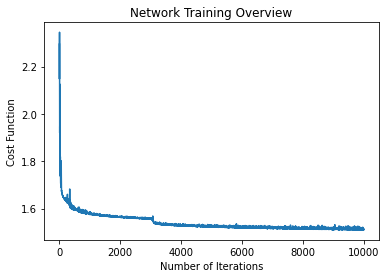

In [0]:
# Visualization code
import matplotlib.pyplot as plt
# Must have variable named as `cost_history` with 1 dimension.
plt.plot(cost_history)
plt.ylabel('Cost Function')
plt.xlabel('Number of Iterations')
plt.title('Network Training Overview')
plt.show()


### (m) (5 points) Predict!

Use the model parameters obtained from training the network in **(i)** to make predictions on the data. Consider creating a prediction function to aide in this
task.

- **Arguments:**
    - `Y` a matrix of dimension `n_e X K`.
    - `X` a matrix of dimension `m X n_e`.
    - `cache_parameters` a dictionary data structure that contains estimated parameters.
- **Return:**
    - `prediction` predicted values

_Hint:_ Logic for this was rewritten during the forward propagation step. 


In [0]:
def predict(X, cache_parameters):

  sm, _ = forward_prop(X, cache_parameters)
  predictions = sm.argmax(axis = 0)

  return predictions

predictions = predict(x_test, cache_parameters)

The following should be used to show the image alongside of its predicted
class.

Note: 

- [`np.argmax(data)`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html) returns the index of the highest value.
- [`np.max(data)`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.max.html) returns the highest value.

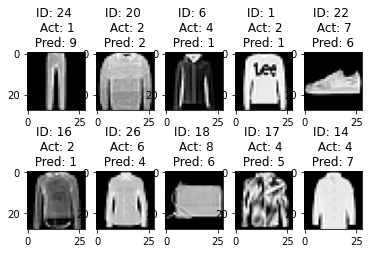

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import matplotlib.pyplot as plt

fashion_mnist_viz = tf.keras.datasets.fashion_mnist

# Load the MNIST data via a helper
(x_train_viz, y_train_viz), (x_test_viz, y_test_viz) = fashion_mnist_viz.load_data()
# Perform scaling
x_train_viz, x_test_viz = x_train_viz / 255.0, x_test_viz / 255.0

# Set seed for reproducibility
################################################
# Change to the last four digits of your UIN
################################################
np.random.seed(8173)

# Obtain a set of indices to obtain predictions
idx = list(np.random.randint(x_test_viz.shape[1], size = 10))

for i in range(10):
  obs = idx[i]                      # Retrieve the index
  plt.subplot(2, 5, i+1)            # Create a subplot
  img = x_test_viz[obs].reshape((28,28))# Examples x Width x Height
  pred = predictions[i]
  plt.imshow(img, cmap='gray')      # Plot gray scale
  plt.title(f'ID: {obs} \n Act: {y_test_viz[obs]}\n Pred: {pred} ')

## [20 points] Exercise 2 - Cruisin' Keras!

In this exercise block, we'll implement the same neural network from **Exercise 1** but using Keras. 


### (a) (10 points) Structuring a model in keras

Structure a two-layer sequential model in Keras that mirrors the guidelines in **Exercise 1**. Show the model layer information.

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential([
                                 keras.layers.InputLayer(input_shape = [784], name = 'input'),
                                 keras.layers.Dense(64, kernel_initializer = 'he_normal', activation = 'relu', name = 'relu'),
                                 keras.layers.Dense(10, kernel_initializer = 'he_normal', activation = 'sigmoid', name = 'sigmoid'),
                                 keras.layers.Activation('softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
relu (Dense)                 (None, 64)                50240     
_________________________________________________________________
sigmoid (Dense)              (None, 10)                650       
_________________________________________________________________
activation (Activation)      (None, 10)                0         
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


### (b) (10 points) Model Training

Train the neural network within Keras. Training should be done in a similar 
manner to **Exercise 1 (j) and (k)**. Unlike before, please construct a graph that shows training and test behavior. This information is available on
the `model.fit` call.

In [0]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = keras.optimizers.SGD(learning_rate = 1e-4),
              metrics = ['accuracy'])

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# Perform scaling
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)
#10000 epochs as training times out before finishing 100k...
history = model.fit(x_train, y_train_ohc, batch_size = x_train.shape[0], epochs = 10000, validation_data = (x_test, y_test_ohc))

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 61ms/step - loss: 2.2181 - accuracy: 0.2798 - val_loss: 2.2199 - val_accuracy: 0.2724
Epoch 7502/10000
1/1 [==============================] - 0s 71ms/step - loss: 2.2181 - accuracy: 0.2798 - val_loss: 2.2199 - val_accuracy: 0.2724
Epoch 7503/10000
1/1 [==============================] - 0s 57ms/step - loss: 2.2181 - accuracy: 0.2799 - val_loss: 2.2199 - val_accuracy: 0.2726
Epoch 7504/10000
1/1 [==============================] - 0s 63ms/step - loss: 2.2181 - accuracy: 0.2799 - val_loss: 2.2199 - val_accuracy: 0.2726
Epoch 7505/10000
1/1 [==============================] - 0s 63ms/step - loss: 2.2180 - accuracy: 0.2799 - val_loss: 2.2199 - val_accuracy: 0.2726
Epoch 7506/10000
1/1 [==============================] - 0s 65ms/step - loss: 2.2180 - accuracy: 0.2799 - val_loss: 2.2199 - val_accuracy: 0.2726
Epoch 7507/10000
1/1 [==============================] - 0s 61ms/step - loss: 2.2180 - accuracy: 

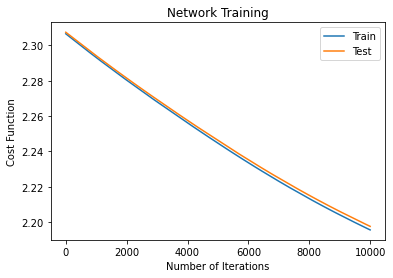

In [0]:
# Visualization code here... 

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Network Training')
plt.ylabel('Cost Function')
plt.xlabel('Number of Iterations')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()


## [30 points] Exercise 3 - PyTorch et al are friends not food!

This exercises mirrors the prior approaches taken in **Exercise 1** and **Exercise 2** except written with PyTorch.


### (a) (10 points) Design the nn module

Re-create the neural network structure within _PyTorch_'s `nn` module.


In [0]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR
from torchsummary import summary 
# Detect if a GPU is present with CUDA support
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {} 

class Net(nn.Module):

  def __init__(self):

    super(Net, self).__init__()

    self.h1 = nn.Linear(784, 64)
    w1 = he_initializer(self.h1.weight.shape[1], self.h1.weight.shape[0]) #he normal initialization
    w1 = torch.from_numpy(w1).float().to(device)
    self.h1.weight.data = w1 # apply weights to layer

    self.h2 = nn.Linear(64, 10)
    w2 = he_initializer(self.h2.weight.shape[1], self.h2.weight.shape[0]) #he normal initialization
    w2 = torch.from_numpy(w2).float().to(device)
    self.h2.weight.data = w2 # apply weights to layer
  
  def forward(self, x):

    x = self.h1(x)
    x = F.relu(x)
    x = self.h2(x)
    x = torch.sigmoid(x)
    output = F.log_softmax(x, dim = 1)
    return output
  
model = Net().to(device)
summary(model, (60000, 784))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1            [-1, 60000, 64]          50,240
            Linear-2            [-1, 60000, 10]             650
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 179.44
Forward/backward pass size (MB): 33.87
Params size (MB): 0.19
Estimated Total Size (MB): 213.51
----------------------------------------------------------------


### (b) (10 points) Training and Test functions

Wrap the `nn` module work into two functions that cover the training period and the testing behavior.

In [0]:
train_loader = torch.utils.data.DataLoader(
    datasets.FashionMNIST('../data', train=True, download=True,
                    transform=transforms.Compose([
                    transforms.ToTensor(),
                    transforms.Normalize((0.1307,), (0.3081,))
                    ])
                   ),
    batch_size=60000, shuffle=True, **kwargs)

test_loader = torch.utils.data.DataLoader(
    datasets.FashionMNIST('../data', train=False, download=True,
                    transform=transforms.Compose([
                    transforms.ToTensor(),
                    transforms.Normalize((0.1307,), (0.3081,))
                    ])
                   ),
    batch_size=10000, shuffle=True, **kwargs)

def train(model, device, train_loader, optimizer, epoch):

  model.train()

  for batch_idx, (data, target) in enumerate(train_loader):

    data, target = data.to(device), target.to(device)
    data = torch.flatten(data, 1)
    optimizer.zero_grad()
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
  np_loss = loss.cpu().detach().numpy()
  if epoch % 100 == 0:
    print(f'Epoch: {epoch} - Loss: {loss}')
  return np_loss

def test(model, device, test_loader, epoch):
  # Set model to evaluation mode
  model.eval()
  # Initialize variables
  test_loss = 0
  correct = 0
  # Perform computation with gradient disabled
  with torch.no_grad():
    for data, target in test_loader:
      # Load data on device
      data, target = data.to(device), target.to(device)
      data = torch.flatten(data, 1)
      # Feed the network test data
      output = model(data)
      # Sum up batch loss
      test_loss += F.nll_loss(output, target, reduction='sum').item()
      # Get the index of the max log-probability
      pred = output.argmax(dim = 1, keepdim = True)
      # Count number of correct classifications
      correct += pred.eq(target.view_as(pred)).sum().item()
  
  # Compute test loss
  test_loss /= len(test_loader.dataset)
  if epoch % 100 == 0:
    print(f'\nEpoch: {epoch}',
          f'Test set: Loss: {test_loss:.4f}',
          f'Accuracy: {correct}/{len(test_loader.dataset)}',
          f'({100. * correct / len(test_loader.dataset):.0f}%)\n')
  return test_loss
  
optimizer = optim.SGD(model.parameters(), lr = 1e-4)
epochs = 1000 # 1000 epochs because training is much, much slower...

### (b) (10 points) Model fit and visualization

Fit the model and show the visualization results. 

Please construct a visual graph yourself for this exercise. 



In [0]:
train_losses = np.zeros(1000)
test_losses = np.zeros(1000)
for epoch in range(epochs): 

  loss = train(model, device, train_loader, optimizer, epoch)
  train_losses[epoch] = loss
  test_loss = test(model, device, test_loader, epoch)
  test_losses[epoch] = test_loss

Epoch: 0 - Loss: 2.3362956047058105

Epoch: 0 Test set: Loss: 2.3353 Accuracy: 1299/10000 (13%)

Epoch: 100 - Loss: 2.330995559692383

Epoch: 100 Test set: Loss: 2.3300 Accuracy: 1335/10000 (13%)

Epoch: 200 - Loss: 2.325589179992676

Epoch: 200 Test set: Loss: 2.3247 Accuracy: 1367/10000 (14%)

Epoch: 300 - Loss: 2.3200671672821045

Epoch: 300 Test set: Loss: 2.3192 Accuracy: 1410/10000 (14%)

Epoch: 400 - Loss: 2.3144164085388184

Epoch: 400 Test set: Loss: 2.3136 Accuracy: 1442/10000 (14%)

Epoch: 500 - Loss: 2.308633804321289

Epoch: 500 Test set: Loss: 2.3079 Accuracy: 1493/10000 (15%)

Epoch: 600 - Loss: 2.302722930908203

Epoch: 600 Test set: Loss: 2.3020 Accuracy: 1528/10000 (15%)

Epoch: 700 - Loss: 2.2966935634613037

Epoch: 700 Test set: Loss: 2.2961 Accuracy: 1569/10000 (16%)

Epoch: 800 - Loss: 2.290560722351074

Epoch: 800 Test set: Loss: 2.2900 Accuracy: 1610/10000 (16%)

Epoch: 900 - Loss: 2.28434681892395

Epoch: 900 Test set: Loss: 2.2838 Accuracy: 1645/10000 (16%)



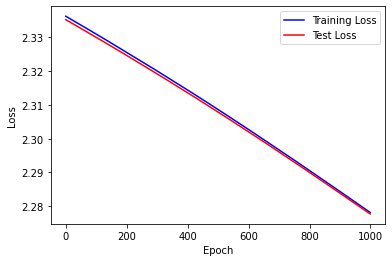

In [0]:
import matplotlib.pyplot as plt
plt.plot(np.arange(1000), train_losses, color = 'blue', label = 'Training Loss')
plt.plot(np.arange(1000), test_losses, color = 'red', label = 'Test Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()